<a href="https://colab.research.google.com/github/mrunalini-ch/Deep-Learning/blob/main/DL_lab_2(regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Chintham Mrunalini

**Student ID:** 22WU0104031


**LAB 2**

***Explore and implement various regularization techniques to prevent overfitting in a deep learning model***

**key features**
1. importing all necessary libraries(mainly tensorflow and keras)
2. loading the MNIST dataset


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset (Using MNIST as an example)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


***Baseline model***

**key features**
1. simple neural network without the regularization.
2. shows high training but low validation accuracy
3. likely to overfit since there is no regularization.


In [2]:
# Baseline Model
def build_baseline_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8747 - loss: 0.4377 - val_accuracy: 0.9598 - val_loss: 0.1350
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9654 - loss: 0.1187 - val_accuracy: 0.9698 - val_loss: 0.1002
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0759 - val_accuracy: 0.9739 - val_loss: 0.0822
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9743 - val_loss: 0.0804
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0432 - val_accuracy: 0.9751 - val_loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.9810 - val_loss: 0.0626
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9935 - loss: 0.0213 

Training History:
{'accuracy': [0.9248499870300293, 0.9666833281517029, 0.9767000079154968, 0.982366681098938, 0.9865666627883911, 0.9889333248138428, 0.991266667842865, 0.9928833246231079, 0.9938666820526123, 0.9951666593551636], 'loss': [0.2613268792629242, 0.11357475817203522, 0.07786080241203308, 0.058449964970350266, 0.04506922885775566, 0.035553835332393646, 0.02800753153860569, 0.022344645112752914, 0.019378427416086197, 0.01641891524195671], 'val_accuracy': [0.9598000049591064, 0.9697999954223633, 0.9739000201225281, 0.9743000268936157, 0.9750999808311462, 0.9810000061988831, 0.9775000214576721, 0.9782000184059143, 0.9807000160217285, 0.9805999994277954], 'val_loss': [0.13495302200317383, 0.10015985369682312, 0.08223386108875275, 0.08038453012704849, 0.08523710072040558, 0.06256363540887833, 0.07326477020978928, 0.07561429589986801, 0.06943348050117493, 0.07248445600271225]}


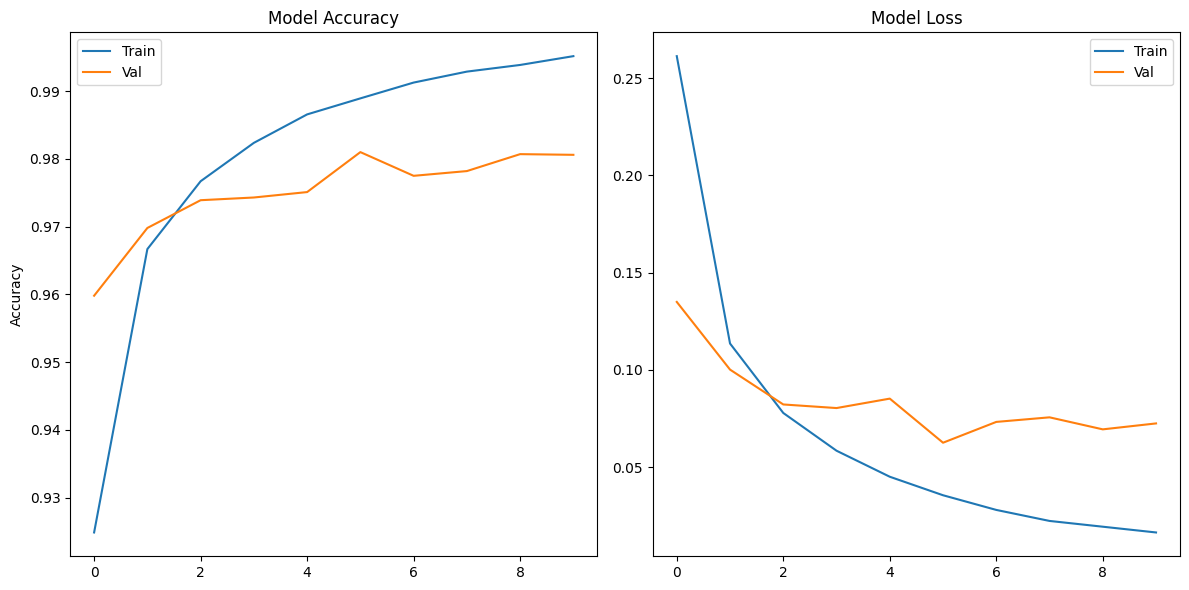

In [3]:
# Print training history
print("Training History:")
print(history_baseline.history)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'])
plt.plot(history_baseline.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'])
plt.plot(history_baseline.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

***L1 and L2***

**key features**

1. **L1:** forces some weights to become zero, which increases the sparsity.

  -->helps in feature selecion and reduces complexity of the model.

2. **L2:** large weights are shrinked and not set to zero

  --> leads to smoot boundaries

3. Controls overfitting by adding penalties to larger weights.

In [4]:
# L1 and L2 Regularization
def build_l1_l2_model(l1=0.01, l2=0.01):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

l1_l2_model = build_l1_l2_model(0.01, 0.01)
history_l1_l2 = l1_l2_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7579 - loss: 5.1121 - val_accuracy: 0.8477 - val_loss: 1.2336
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8497 - loss: 1.1971 - val_accuracy: 0.8709 - val_loss: 1.0701
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8639 - loss: 1.0772 - val_accuracy: 0.8796 - val_loss: 1.0051
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8687 - loss: 1.0186 - val_accuracy: 0.8846 - val_loss: 0.9700
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8663 - loss: 1.0004 - val_accuracy: 0.8867 - val_loss: 0.9198
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8729 - loss: 0.9629 - val_accuracy: 0.8662 - val_loss: 0.9443
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8734 - loss: 0.9475 - val_accuracy: 0.8838 - val_loss: 0.8773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8742 - loss: 0.9

Training History:
{'accuracy': [0.8110666871070862, 0.8544333577156067, 0.862766683101654, 0.8687833547592163, 0.8686500191688538, 0.8723666667938232, 0.8724499940872192, 0.8744666576385498, 0.8755333423614502, 0.8769833445549011], 'loss': [2.204108953475952, 1.1614981889724731, 1.0669106245040894, 1.010903239250183, 0.9841496348381042, 0.9592086672782898, 0.9470136761665344, 0.9299306869506836, 0.9206167459487915, 0.9066657423973083], 'val_accuracy': [0.8476999998092651, 0.8708999752998352, 0.8795999884605408, 0.8845999836921692, 0.8866999745368958, 0.8661999702453613, 0.8838000297546387, 0.8914999961853027, 0.8780999779701233, 0.8931999802589417], 'val_loss': [1.2336227893829346, 1.0701254606246948, 1.0051229000091553, 0.9699760675430298, 0.91976398229599, 0.9442736506462097, 0.877328634262085, 0.8800066113471985, 0.9075144529342651, 0.8467743992805481]}


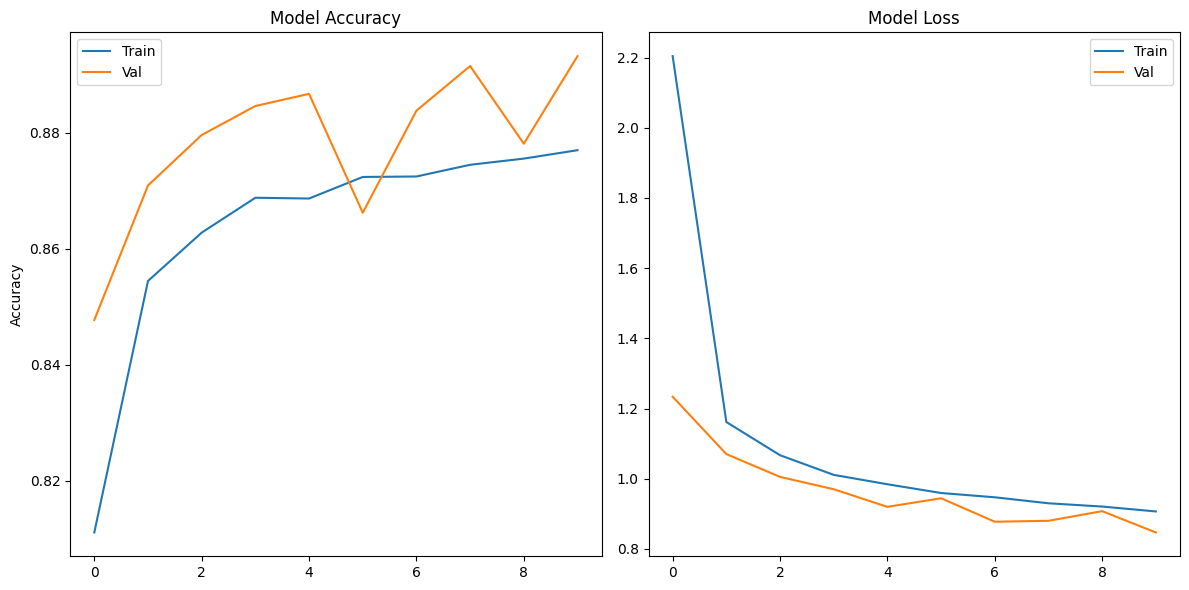

In [5]:
# Print training history
print("Training History:")
print(history_l1_l2.history)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_l1_l2.history['accuracy'])
plt.plot(history_l1_l2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_l1_l2.history['loss'])
plt.plot(history_l1_l2.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

***Dropout***

**key features**

1. deactivates neurons while training to reduce dependency, this is done randomly.
2. no co-adaption, so, it learns more robust features.
3. Improves generalization


In [6]:
# Dropout
def build_dropout_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = build_dropout_model(0.5)
history_dropout = dropout_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8124 - loss: 0.6172 - val_accuracy: 0.9506 - val_loss: 0.1669
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9333 - loss: 0.2341 - val_accuracy: 0.9634 - val_loss: 0.1277
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9435 - loss: 0.1898 - val_accuracy: 0.9669 - val_loss: 0.1055
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9503 - loss: 0.1682 - val_accuracy: 0.9690 - val_loss: 0.1002
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9532 - loss: 0.1521 - val_accuracy: 0.9690 - val_loss: 0.0967
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9563 - loss: 0.1421 - val_accuracy: 0.9728 - val_loss: 0.0908
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9593 - loss: 0.1315 - val_accuracy: 0.9734 - val_loss: 0.0906
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9609 - loss: 0.1261 

Training History:
{'accuracy': [0.8825666904449463, 0.9345333576202393, 0.9441666603088379, 0.9508000016212463, 0.9538166522979736, 0.9571999907493591, 0.9581833481788635, 0.9612666964530945, 0.9625333547592163, 0.963949978351593], 'loss': [0.3969591557979584, 0.2248760312795639, 0.18518254160881042, 0.16522851586341858, 0.15086451172828674, 0.13970163464546204, 0.13530224561691284, 0.12549760937690735, 0.11873649060726166, 0.11419262737035751], 'val_accuracy': [0.9506000280380249, 0.9634000062942505, 0.9668999910354614, 0.968999981880188, 0.968999981880188, 0.9728000164031982, 0.9733999967575073, 0.9742000102996826, 0.975600004196167, 0.9750000238418579], 'val_loss': [0.16691747307777405, 0.12772980332374573, 0.1055387556552887, 0.10018563270568848, 0.09671056270599365, 0.09084927290678024, 0.09055139124393463, 0.08634187281131744, 0.08217187225818634, 0.08068833500146866]}


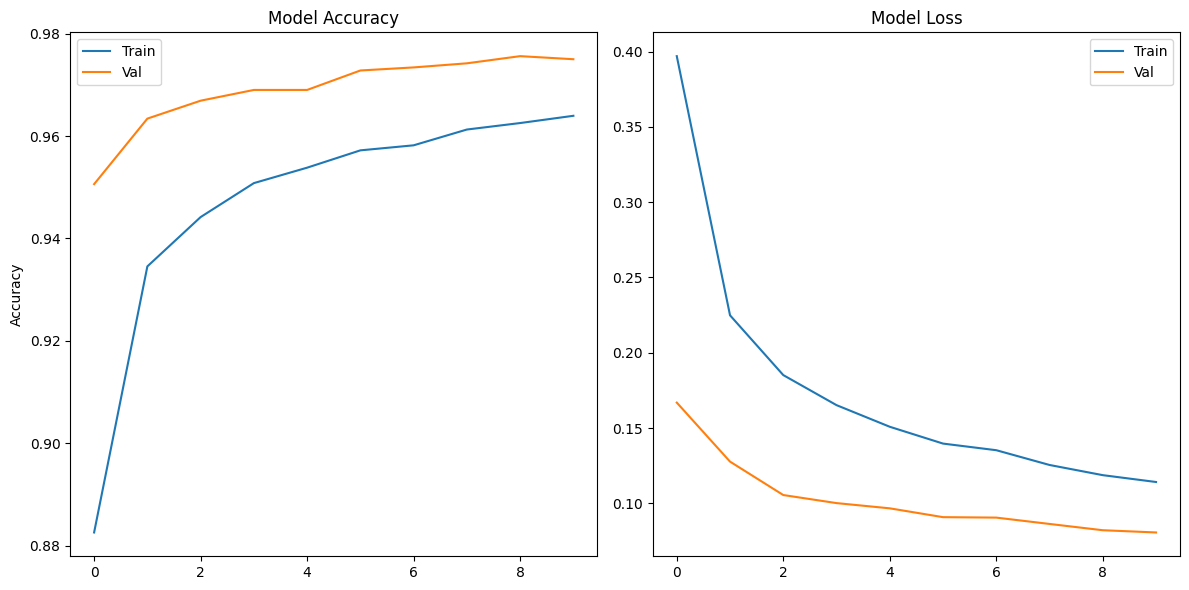

In [7]:
# Print training history
print("Training History:")
print(history_dropout.history)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

***Early stopping***

**key features**

1. reduces overfitting
2. monitors the validation loss and stops training when it stops improving.


In [8]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
early_stop_model = build_baseline_model()
history_early_stop = early_stop_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8735 - loss: 0.4414 - val_accuracy: 0.9577 - val_loss: 0.1472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9632 - loss: 0.1253 - val_accuracy: 0.9718 - val_loss: 0.0946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9764 - loss: 0.0775 - val_accuracy: 0.9725 - val_loss: 0.0932
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0571 - val_accuracy: 0.9759 - val_loss: 0.0779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9787 - val_loss: 0.0714


In [9]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
early_stop_model = build_l1_l2_model()
history_early_stop = early_stop_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7602 - loss: 5.1202 - val_accuracy: 0.8491 - val_loss: 1.2125
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8480 - loss: 1.1981 - val_accuracy: 0.8718 - val_loss: 1.0715
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8571 - loss: 1.0920 - val_accuracy: 0.8679 - val_loss: 0.9894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8618 - loss: 1.0242 - val_accuracy: 0.8764 - val_loss: 0.9537
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8698 - loss: 0.9807 - val_accuracy: 0.8761 - val_loss: 0.9283


In [10]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
early_stop_model = build_dropout_model()
history_early_stop = early_stop_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8141 - loss: 0.6093 - val_accuracy: 0.9520 - val_loss: 0.1648
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9281 - loss: 0.2404 - val_accuracy: 0.9612 - val_loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9420 - loss: 0.1929 - val_accuracy: 0.9676 - val_loss: 0.1051
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9495 - loss: 0.1661 - val_accuracy: 0.9696 - val_loss: 0.0991
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1498 - val_accuracy: 0.9712 - val_loss: 0.0928


***Data augumentation***

**key features**

1. increases dataset diversity through rotation, flipping zooming, etc.
2. improves robustness of the model.
3. helps in reducing the overfitting.


In [15]:
# Data Augmentation
data_gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
data_gen.fit(x_train.reshape(-1, 28, 28, 1))
augmented_model = build_l1_l2_model()
history_augmented = augmented_model.fit(data_gen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.4253 - loss: 5.6276 - val_accuracy: 0.7656 - val_loss: 1.5326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.5603 - loss: 1.9816 - val_accuracy: 0.7770 - val_loss: 1.4251
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6010 - loss: 1.8653 - val_accuracy: 0.7579 - val_loss: 1.4231
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.6206 - loss: 1.8059 - val_accuracy: 0.8288 - val_loss: 1.3409
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6421 - loss: 1.7421 - val_accuracy: 0.8226 - val_loss: 1.3056
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.6615 - loss: 1.6939 - val_accuracy: 0.8285 - val_loss: 1.2701
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.6795 - loss: 1.6376 - val_accuracy: 0.8459 - val_loss: 1.2295
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6903 -

Training History:
{'accuracy': [0.4895833432674408, 0.5712833404541016, 0.6036499738693237, 0.626466691493988, 0.6460999846458435, 0.6660833358764648, 0.6813499927520752, 0.6928333044052124, 0.6980000138282776, 0.7079166769981384], 'loss': [2.8696069717407227, 1.9489431381225586, 1.8527714014053345, 1.7872198820114136, 1.7323932647705078, 1.6807094812393188, 1.6311589479446411, 1.6001869440078735, 1.5769540071487427, 1.5514873266220093], 'val_accuracy': [0.7656000256538391, 0.7770000100135803, 0.7578999996185303, 0.8288000226020813, 0.8226000070571899, 0.828499972820282, 0.8458999991416931, 0.855400025844574, 0.8472999930381775, 0.857200026512146], 'val_loss': [1.5326422452926636, 1.4251086711883545, 1.4231373071670532, 1.340880274772644, 1.3056039810180664, 1.2700625658035278, 1.229536771774292, 1.196440577507019, 1.1971997022628784, 1.1848706007003784]}


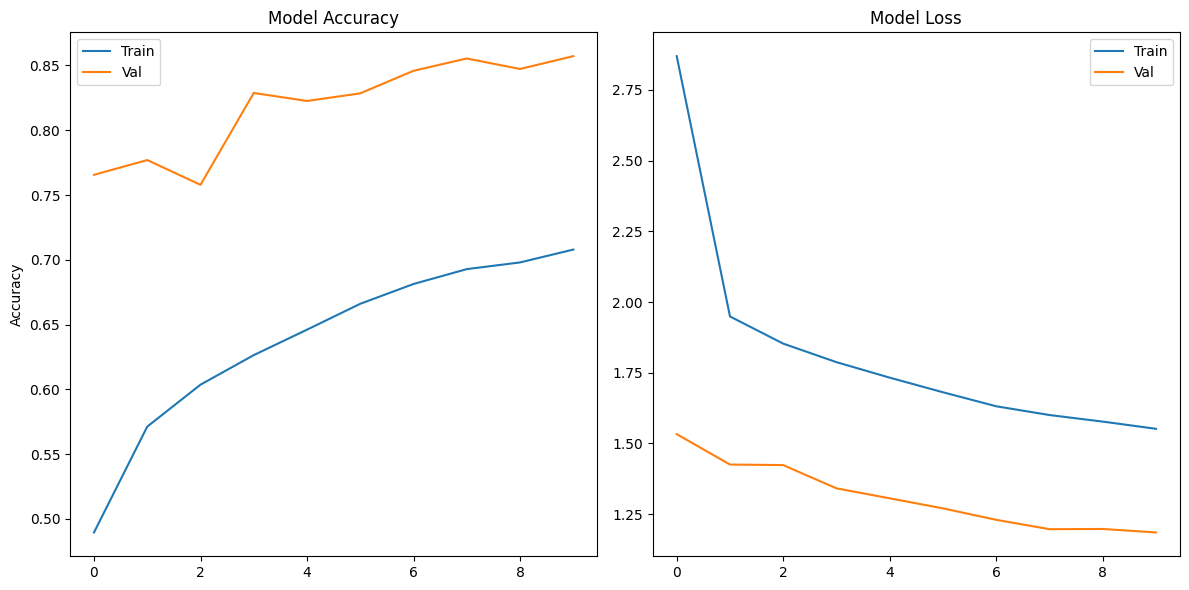

In [16]:
# Print training history
print("Training History:")
print(history_augmented.history)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'])
plt.plot(history_augmented.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'])
plt.plot(history_augmented.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

***Combined Regularization***

**key features**

1. best balance between overfitting prevention and the accuracy of the model.
2. high validation accuracy and lowest overfitting.

In [13]:
# Combined Regularization
def build_combined_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

combined_model = build_combined_model()
history_combined = combined_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7944 - loss: 1.1987 - val_accuracy: 0.9160 - val_loss: 0.4895
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8885 - loss: 0.5633 - val_accuracy: 0.9310 - val_loss: 0.4199
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8991 - loss: 0.5274 - val_accuracy: 0.9412 - val_loss: 0.3799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9017 - loss: 0.5032 - val_accuracy: 0.9423 - val_loss: 0.3702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9043 - loss: 0.4931 - val_accuracy: 0.9435 - val_loss: 0.3722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9077 - loss: 0.4881 - val_accuracy: 0.9462 - val_loss: 0.3619
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9083 - loss: 0.4831 - val_accuracy: 0.9482 - val_loss: 0.3529
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9108 - loss: 0.47

Training History:
{'accuracy': [0.8532500267028809, 0.8906166553497314, 0.8983833193778992, 0.9024999737739563, 0.9046333432197571, 0.9075000286102295, 0.9067333340644836, 0.9096166491508484, 0.9099000096321106, 0.9089833498001099], 'loss': [0.7924894094467163, 0.5514461994171143, 0.5200070142745972, 0.5010836720466614, 0.493375688791275, 0.48711833357810974, 0.48828017711639404, 0.4810885787010193, 0.48077505826950073, 0.47884228825569153], 'val_accuracy': [0.9160000085830688, 0.9309999942779541, 0.9412000179290771, 0.942300021648407, 0.9434999823570251, 0.9462000131607056, 0.948199987411499, 0.9453999996185303, 0.9484000205993652, 0.9470000267028809], 'val_loss': [0.4895237684249878, 0.41991743445396423, 0.3798856735229492, 0.37016162276268005, 0.3721999526023865, 0.36192288994789124, 0.35286980867385864, 0.37105926871299744, 0.3555167615413666, 0.3594880998134613]}


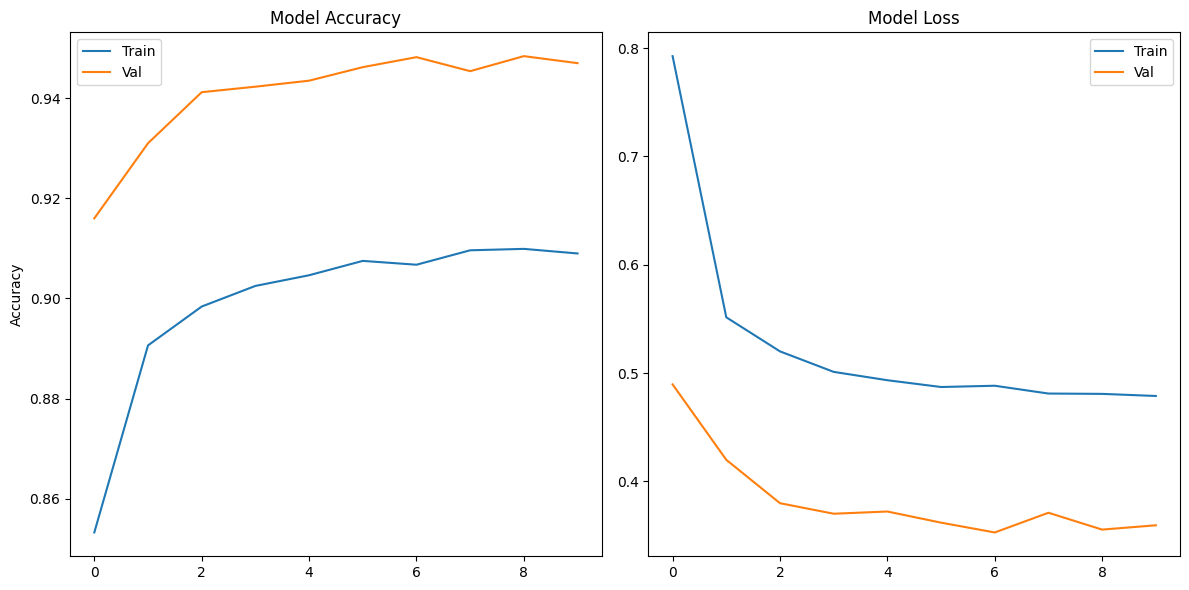

In [14]:
# Print training history
print("Training History:")
print(history_combined.history)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_combined.history['accuracy'])
plt.plot(history_combined.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_combined.history['loss'])
plt.plot(history_combined.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.tight_layout()
plt.show()

**2B**

***Handwritten Digits Classification***

**key features**

1. Load and preprocess the dataset.
2. Build and train a neural network (without regularization)
3. Build and train a neural network (with regularization)
4. Compare the performance of both models.


**step 1:** import libraries tht are necessary

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

**step 2:** load dataset

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

**step 3:** preprocessing of the data

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**step 4:** visualizing the sample data

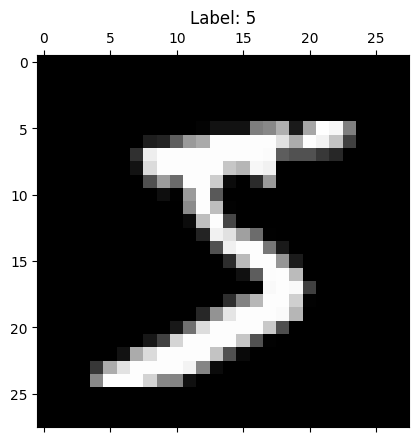

In [20]:
plt.matshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {np.argmax(y_train[0])}')
plt.show()

**step 5:** build a simple neural network(basic model)


In [21]:
model_basic = keras.Sequential([
    layers.Dense(10, input_shape=(784,), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**step 6:** train the basic model

In [22]:
model_basic.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_basic = model_basic.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8065 - loss: 0.7270 - val_accuracy: 0.9158 - val_loss: 0.3059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9123 - loss: 0.3121 - val_accuracy: 0.9202 - val_loss: 0.2861
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9192 - loss: 0.2880 - val_accuracy: 0.9238 - val_loss: 0.2757
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2689 - val_accuracy: 0.9260 - val_loss: 0.2697
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9259 - loss: 0.2683 - val_accuracy: 0.9255 - val_loss: 0.2685


**step 7:** build a neural network with no regularization

In [23]:
model_no_reg = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**step 8:** compile and train

In [24]:
model_no_reg.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_no_reg = model_no_reg.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8785 - loss: 0.4173 - val_accuracy: 0.9638 - val_loss: 0.1217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9694 - loss: 0.1013 - val_accuracy: 0.9676 - val_loss: 0.1019
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9785 - loss: 0.0701 - val_accuracy: 0.9753 - val_loss: 0.0840
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9773 - val_loss: 0.0744
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9726 - val_loss: 0.0942
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9767 - val_loss: 0.0793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9776 - val_loss: 0.0812
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9926 - loss: 0.02

**step 9:** build a neural network with regularization


In [25]:
model_reg = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

**step 10:** compile and train

In [26]:
model_reg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_reg = model_reg.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8747 - loss: 0.6248 - val_accuracy: 0.9592 - val_loss: 0.2754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9593 - loss: 0.2675 - val_accuracy: 0.9682 - val_loss: 0.2298
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9660 - loss: 0.2273 - val_accuracy: 0.9706 - val_loss: 0.1955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9695 - loss: 0.2031 - val_accuracy: 0.9684 - val_loss: 0.2033
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9721 - loss: 0.1891 - val_accuracy: 0.9687 - val_loss: 0.1882
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9745 - loss: 0.1755 - val_accuracy: 0.9708 - val_loss: 0.1819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9747 - loss: 0.1709 - val_accuracy: 0.9723 - val_loss: 0.1774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.1

**step 11:** compare results with plotting them

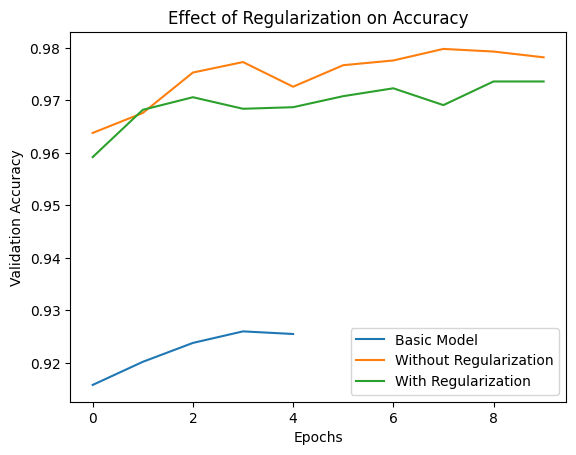

In [27]:
plt.plot(history_basic.history['val_accuracy'], label='Basic Model')
plt.plot(history_no_reg.history['val_accuracy'], label='Without Regularization')
plt.plot(history_reg.history['val_accuracy'], label='With Regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Regularization on Accuracy')
plt.show()